# A Note On This Notebook

### This notebook classifies the test data for Ethos Mining into containing ethos or not. The results are not exactly the same as those reported in the paper (https://www.ijcai.org/Proceedings/2018/0562.pdf) as there is a calculation step needed which has not been included as part of this notebook. A line of code pre-process the train and test set removing some examples, these need to be factored in for the final results. See the cell containing this: 

test = test[test["NNRExtracts"] != '[ ]' ]
test = test[test["parNum"] > 2]
test_text = test["Text"])

### This code removes the first question and answer in the debate and removes utterance that did not contain a value after entity and related work extraction. 

In [113]:
from collections import Counter
from datetime import datetime
 
import json
 
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Flatten
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
import keras as keras
import numpy as np
np.random.seed(1337)
import re
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import re

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Concatenate
from keras.layers import Merge

In [84]:
import csv
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import re
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier

In [85]:
def preProcess(corpus):

    for i in range(0, len(corpus)):
        tt = corpus["Text"][i]
        tt = tt.encode('ascii', 'ignore').decode('ascii')
        tt = str(tt)
        tt = tt.replace(",", "")
        tt = tt.replace("[", "")
        tt = tt.replace("]", "")
        #tt = tt.replace("always", "")
        #tt = tt.strip()
        tt = tt.replace("''", "")
        #tt = tt.replace(".", "")  
        tt = tt.strip()
        tt = re.sub("\d+", " ", tt)
        
        sent = tt
        sent = sent.lower()
        
        sent = checkPeople("may", "", sent, "")
        sent = checkPeople("will", "", sent, "")
        sent = checkPeople("did", "", sent, "")
        sent = checkPeople("does", "",sent, "")
        sent = checkPeople("has", "",sent, "")
        sent = checkPeople("is", "",sent, "")
        sent = checkPeople("can", "", sent, "")
        sent = checkPeople("would", "", sent, "")
        sent = checkPeople("ask", "", sent, "")
        
        sent = checkPeople("will not", "", sent, "")
        sent = checkPeople("does not", "",sent, "")
        sent = checkPeople("has not", "",sent, "")
        sent = checkPeople("is not", "",sent, "")
        sent = checkPeople("can not", "", sent, "")
        sent = checkPeople("would not", "", sent, "")
        sent = checkPeople("ask not", "", sent, "")
        
        
        
        
        sent = checkPeople("", "refers", sent, "")
        sent = checkPeople("", "refer", sent, "")
        sent = checkPeople("", "referred", sent, "")
        sent = checkPeople("", "referring", sent, "")
        
        if not "why have the government " in sent:
            
            sent = sent.replace("have the government ", "")
        sent = sent.replace("my hon. friend said", "")
        sent = sent.replace("my right hon. friend said", "")
        sent = sent.replace("my right hon. and learned friend said", "")
        sent = sent.replace(" i ", " ")
        sent = sent.replace(" the right hon. and learned", " ")
        sent = sent.replace(" the right hon.", " ")
        sent = sent.replace(" the hon.", " ")
        sent = sent.replace("the hon.", " ")
        sent = sent.replace("the government", " ")
        sent = sent.replace(" right hon. and learned", " ")
        sent = sent.replace(" right hon.", " ")
        sent = sent.replace("hon.", " ")
       
        sent = sent.replace("gentleman", " ")
        sent = sent.replace("gentleman's", " ")
        sent = sent.replace("friend", " ")
        sent = sent.replace("friend's", " ")
        #sent = sent.replace("member", "")
        sent = sent.replace("'s", " ")
        sent = sent.replace(" he ", " ")
        sent = sent.replace(" his ", " ")
        sent = sent.replace(" her ", " ")
        sent = sent.replace(" she ", " ")
        sent = sent.replace(" my ", " ")
        sent = sent.replace(" the minister ", " ")
        sent = sent.replace(" labour ", " ")
        sent = sent.replace(" conservative ", " ")
        sent = sent.replace(" party ", " ")
        
    
        corpus.set_value(i,'Text',sent)

In [86]:
def checkPeople(word, wordA, sent, replacer):
    
    word = word + " "
   
        
    if not "why " + word + "he " in sent:
        sent = sent.replace(word + "he " + wordA, replacer)
    if not "why " + word + "she " in sent:
        sent = sent.replace(word + "she "+ wordA, replacer)
    if not "why " + word + "the secretary " in sent:
        sent = sent.replace(word +"the secretary "+ wordA,replacer)
    if not "why " + word + "the minister " in sent in sent:
        sent = sent.replace(word +"the minister "+ wordA, replacer)
    if not "why " + word + "the under secretary " in sent:
        sent = sent.replace(word +"the under secretary "+ wordA, replacer)
    if not "why " + word + "the foreign secretary " in sent:
        sent = sent.replace(word +"the foreign secretary "+ wordA, replacer)
    if not "why " + word + "the prime minister " in sent:
        sent = sent.replace(word +"the prime minister "+ wordA, replacer)
    if not "why " + word + "the chancellor " in sent:
        sent = sent.replace(word +"the chancellor "+ wordA, replacer)
    if not "why " + word + "the hon. gentleman " in sent:
        sent = sent.replace(word +"the hon. gentleman "+ wordA, replacer)
    if not "why " + word + "the right hon. gentleman " in sent:
        sent = sent.replace(word +"the right hon. gentleman "+ wordA, replacer)
    if not "why " + word + "the right hon. and learned gentleman " in sent:
        sent = sent.replace(word +"the right hon. and learned gentleman "+ wordA, replacer)
    if not "why " + word + "the hon. lady " in sent:
        sent = sent.replace(word +"the hon. lady "+ wordA, replacer)
    if not "why " + word + "the right hon. lady " in sent:
        sent = sent.replace(word +"the right hon. lady "+ wordA, replacer)
    if not "why " + word + "the right hon. and learned lady " in sent:
        sent = sent.replace(word +"the right hon. and learned lady "+ wordA, replacer)
    if not "why " + word + "my hon. friend " in sent:
        sent = sent.replace(word +"my hon. friend "+ wordA, replacer)
    if not "why " + word + "my right hon. friend " in sent:
        sent = sent.replace(word +"my right hon. friend "+ wordA, replacer)
    if not "why " + word + "my right hon. and learned friend " in sent:
        sent = sent.replace(word +"my right hon. and learned friend "+ wordA, replacer)
    if not "why " + word + "the hon. member " in sent:
        sent = sent.replace(word +"the hon. member "+ wordA, replacer)
    if not "why " + word + "the right hon. member " in sent:
        sent = sent.replace(word +"the right hon. member "+ wordA, replacer)
    if not "why " + word + "the right hon. and learned member " in sent:
        sent = sent.replace(word +"the right hon. and learned member "+ wordA, replacer)
    if not "why " + word + "the government " in sent:
        sent = sent.replace(word +"the government "+ wordA, replacer)
    if not "why " + word + "the opposition " in sent:
        sent = sent.replace(word +"the opposition "+ wordA, replacer)


    return sent



In [87]:
class TestCallback(Callback):
    def __init__(self, test_text_data, test_deps_data, test_pos_data, test_rels_data, test_sent_data):
        self.test_text_data = test_text_data
        self.test_deps_data = test_deps_data
        self.test_pos_data = test_pos_data
        self.test_rels_data = test_rels_data
        self.test_sent_data = test_sent_data

    def on_epoch_end(self, epoch, logs={}):
        #x, y = self.test_data
        predictions = model.predict_classes([test_text_data,test_deps_data, test_pos_data, test_rels_data, test_sent_data])

        target_names = ['0', '1']

        print(classification_report(test_labels, predictions, target_names=target_names))

        print(confusion_matrix(test_labels, predictions))

        result = precision_recall_fscore_support(test_labels, predictions, average=None)


        filename = "P-{}R-{}F-{}".format(result[0][1], result[1][1], result[2][1])
        filename = "CNNModelTest/model-" + str(epoch) + "-" + filename + ".hdf5"
        
        #model.save_weights("CNNModelTest/model-P:{}R:{}F:{}.hdf5".format(str(result[0][1]), str(result[1][1]), str(result[2][1])))
        model.save_weights(filename)

In [88]:
train = pd.read_csv("RorgReform.csv", header=0, delimiter=",", encoding='utf-8')
test = pd.read_csv("NewTestReformed.csv", header=0, delimiter=",", encoding='utf-8')

In [89]:
train = train[train["NNRExtracts"] != '[ ]']
train = train[train["parNum"] > 2]
dep = train["Dep"].values

In [90]:
train_text = train["Text"]
train_deps = train["Dep"]
train_pos = train["POS"]
train_rels = train["NNRExtracts"]
labels = train["IsSent"]

In [91]:
test = test[test["NNRExtracts"] != '[ ]' ]
test = test[test["parNum"] > 2]
test_text = test["Text"]
test_labels = test["IsSent"]
test_deps = test["Dep"]
test_pos = test["POS"]
test_rels = test["NNRExtracts"]
test = test.reset_index(drop=True)

In [92]:
text_tokenizer = Tokenizer(num_words=50000)
text_tokenizer.fit_on_texts(train_text)
text_sequences = text_tokenizer.texts_to_sequences(train_text)
text_data = pad_sequences(text_sequences, maxlen=400)


deps_tokenizer = Tokenizer(num_words=50000)
deps_tokenizer.fit_on_texts(train_deps)
deps_sequences = deps_tokenizer.texts_to_sequences(train_deps)
deps_data = pad_sequences(deps_sequences, maxlen=400)

pos_tokenizer = Tokenizer(num_words=50000)
pos_tokenizer.fit_on_texts(train_pos)
pos_sequences = pos_tokenizer.texts_to_sequences(train_pos)
pos_data = pad_sequences(pos_sequences, maxlen=400)

rels_tokenizer = Tokenizer(num_words=50000)
rels_tokenizer.fit_on_texts(train_rels)
rels_sequences = rels_tokenizer.texts_to_sequences(train_rels)
rels_data = pad_sequences(rels_sequences, maxlen=400)

sent_data = train["SentPol"]

In [115]:
model1 = Sequential()
model1.add(Embedding(5000, 128, input_length=400))
model1.add(Dropout(0.2))
#model1.add(Conv1D(32, 5, activation='relu'))
model1.add(MaxPooling1D(pool_size=4))
#model1.add(LSTM(128))
model1.add(Flatten())
model1.add(Dense(10,  activation='sigmoid'))

model2 = Sequential()
model2.add(Embedding(5000, 128, input_length=400))
model2.add(Dropout(0.2))
#model2.add(Conv1D(64, 40, activation='relu'))
model2.add(MaxPooling1D(pool_size=4))
model2.add(LSTM(128))
#model2.add(Flatten())
model2.add(Dense(10, activation='sigmoid'))

model3 = Sequential()
model3.add(Embedding(5000, 128, input_length=400))
model3.add(Dropout(0.2))
#model3.add(Conv1D(64, 40, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
#model3.add(LSTM(128))
model3.add(Flatten())
model3.add(Dense(10, activation='sigmoid'))

model4 = Sequential()
model4.add(Embedding(5000, 128, input_length=400))
model4.add(Dropout(0.2))
#model4.add(Conv1D(32, kernel_size=3, activation='relu'))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
#model4.add(Flatten())
model4.add(Dense(10, activation='sigmoid'))

model6 = Sequential()
model6.add(Dense(30, input_dim=1, activation='linear'))
#model6.add(Dense(20, activation='linear'))

In [116]:
text_sequences = text_tokenizer.texts_to_sequences(test_text)
test_text_data = pad_sequences(text_sequences, maxlen=400)

deps_sequences = deps_tokenizer.texts_to_sequences(test_deps)
test_deps_data = pad_sequences(deps_sequences, maxlen=400)

pos_sequences = pos_tokenizer.texts_to_sequences(test_pos)
test_pos_data = pad_sequences(pos_sequences, maxlen=400)

rels_sequences = rels_tokenizer.texts_to_sequences(test_rels)
test_rels_data = pad_sequences(rels_sequences, maxlen=400)

test_sent_data = test["NewSentPol"]

In [117]:
merged = Merge([model1,model2, model3, model4, model6], mode='concat')

/home/jupyter-rory/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  """Entry point for launching an IPython kernel.


In [118]:
filepath="CNNWeights/weights-improvement-{epoch:02d}-{val_fmeasure:.2f}.hdf5"
filepath2="CNNFullSave/file-{epoch:02d}.hdf5"
checkpoint2 = ModelCheckpoint(filepath2, verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint2, TestCallback(test_text_data, test_deps_data, test_pos_data, test_rels_data, test_sent_data)]


In [119]:
model = Sequential()
model.add(merged)
model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#opt = optimizers.SGD(lr=0.01)
#opt = optimizers.Adam(lr=0.01)
#model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['binary_accuracy', 'fmeasure', 'precision', 'recall'])
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [120]:
#model= Model(inputs=model.input, output=model.output)
model.load_weights("model-15-P-0.5984251968503937R-0.9539748953974896F-0.7354838709677419.hdf5")

In [121]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
#, 'fmeasure', 'precision', 'recall'

predictions = model.predict_classes([test_text_data, test_deps_data, test_pos_data, test_rels_data, test_sent_data])
target_names = ['0', '1']

print(classification_report(test_labels, predictions, target_names=target_names))

print(confusion_matrix(test_labels, predictions))

469/469 [==============================] - 0s     
              precision    recall  f1-score   support

           0       0.88      0.33      0.48       230
           1       0.60      0.95      0.74       239

    accuracy                           0.65       469
   macro avg       0.74      0.64      0.61       469
weighted avg       0.73      0.65      0.61       469

[[ 77 153]
 [ 11 228]]


In [122]:
DMRNNproba = model.predict([test_text_data, test_deps_data, test_pos_data, test_rels_data, test_sent_data])

In [123]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
pr_table = pd.DataFrame(columns=['classifiers', 'p','r','auc'])

In [124]:
fpr, tpr, _ = roc_curve(test_labels,  DMRNNproba)
auc = roc_auc_score(yTestlables,  DMRNNproba)
result_table = result_table.append({'classifiers':'DMRNN',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [125]:
prec, rec, _ = precision_recall_curve(test_labels,  DMRNNproba)
auc = roc_auc_score(test_labels,  DMRNNproba)
pr_table = pr_table.append({'classifiers':'DMRNN',
                                        'p':prec, 
                                        'r':rec, 
                                        'auc':auc}, ignore_index=True)

In [142]:
from sklearn.metrics import f1_score
from numpy import arange
from numpy import argmax

In [143]:
thresholds = arange(0, 1, 0.001)

In [147]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [148]:
scores = [f1_score(test_labels, to_labels(DMRNNproba, t)) for t in thresholds]

In [149]:
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.509, F-Score=0.73701


In [126]:
from sklearn.base import TransformerMixin, BaseEstimator

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        
        self.key = key
        

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

class NumberSelector(BaseEstimator, TransformerMixin):

    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

#############################################################################



############# Create pipeline consisting of feature pipelines ##########################

pipeline5 = Pipeline([
    ('features', FeatureUnion([
        ('ngram', Pipeline([
            ('selector', ItemSelector(key='Text')),
            ('vectorizer', CountVectorizer(ngram_range=(1,3), stop_words="english", lowercase=True)),
        ])),
        # ('ngram_Dep', Pipeline([
            # ('selector', ItemSelector(key='DEPS')),
            # #('vectorizer', CountVectorizer(ngram_range=(1,12))),
            # ('tfidf_transformer',  TfidfVectorizer(ngram_range=(2,3)))
        # ])), 
        # ('ngram_POS', Pipeline([
            # ('selector', ItemSelector(key='POS')),
            # #('vectorizer', CountVectorizer(ngram_range=(1,12))),
            # ('tfidf_transformer',  TfidfVectorizer(ngram_range=(1,3)))
        # ])), 
        # ('Sent', Pipeline([
            # ('selector', NumberSelector(key='Sent')),
            # ('standard', StandardScaler())
        # ])), 
    ],
    
    )),
    #])
    #('classifier',  DecisionTreeClassifier(max_depth=550, criterion="entropy")) ])
    #('classifier',  LinearSVC(C=0.1, verbose = 2, max_iter=2000)) ])
    #('classifier', MultinomialNB())])
    #('classifier', GaussianNB())])
    1('classifier',  LogisticRegression()) ])
    #('classifier', DecisionTreeClassifier(max_depth=8)) ])
    #('classifier',  SVC()) ])
    #('classifier',  DummyClassifier()) ])
    #SVC(kernel='linear', probability=True, verbose=2))
    #, C=100000
    #('classifier',  SVC(kernel='linear', C=1)) ])
    #('classifier',  RandomForestClassifier(max_depth=10000, random_state=0)) ])
    #('classifier',  RandomForestClassifier(max_depth=60, min_samples_leaf=3)) ])


In [127]:
model = pipeline5.fit(train, train["IsSent"])

In [128]:
predictions = model.predict(test)
yproba = model.predict_proba(test)[::,1]

### use numerical target names: 0 = NONE, 1 = FAVOR, 2 = AGAINST
 
target_names = ['0', '1']

print(confusion_matrix(test["IsSent"], predictions))

print(classification_report(test["IsSent"], predictions, target_names=target_names))

[[  1 229]
 [  2 237]]
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       230
           1       0.51      0.99      0.67       239

    accuracy                           0.51       469
   macro avg       0.42      0.50      0.34       469
weighted avg       0.42      0.51      0.35       469



In [129]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [130]:
yTestlables = test["IsSent"]

In [131]:
yTestlables

0      0
1      0
2      0
3      0
4      0
      ..
464    1
465    1
466    1
467    1
468    1
Name: IsSent, Length: 469, dtype: int64

In [132]:
fpr, tpr, _ = roc_curve(yTestlables,  yproba)
auc = roc_auc_score(yTestlables,  yproba)
result_table = result_table.append({'classifiers':'LR',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [133]:
prec, rec, _ = precision_recall_curve(test_labels,  yproba)
auc = roc_auc_score(test_labels,  yproba)
pr_table = pr_table.append({'classifiers':'LR',
                                        'p':prec, 
                                        'r':rec, 
                                        'auc':auc}, ignore_index=True)

In [134]:


# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
pr_table.set_index('classifiers', inplace=True)

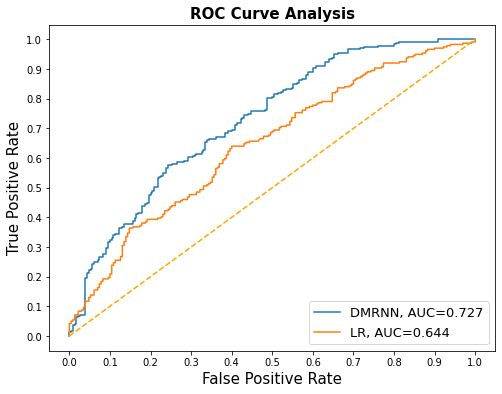

In [135]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

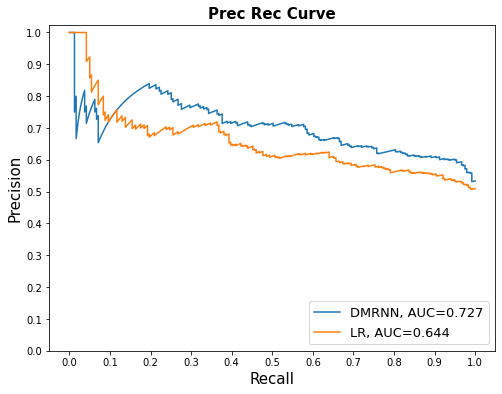

In [139]:
fig = plt.figure(figsize=(8,6))

for i in pr_table.index:
    plt.plot(pr_table.loc[i]['r'], 
             pr_table.loc[i]['p'], 
             label="{}, AUC={:.3f}".format(i, pr_table.loc[i]['auc']))
    

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Prec Rec Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')